<a href="https://colab.research.google.com/github/troyapaytan/tpportfolio/blob/main/FNN_SVM_RF%20COMPARISON/FNN_SVM_RF_TERM_PROJECT_CS171.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Marc Jason M. Chan

Troy Andrei Paytan

In [ ]:
#Import necessary libraries

import os
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import PIL.Image
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Step 1 - Dataset Labeling##

Load the dataset and label each instance with its corresponding emotion class. For example, if an image represents a happy expression, label it as 'happy.' Similarly, label other images with their respective emotion classes.

In [ ]:
data_dir = "/content/drive/MyDrive/Module 3 dataset/train"  # Replace this with the path to your main folder
emotion_classes = ["happy", "disgust", "fear", "surprise", "angry", "neutral", "sad"]

# Initialize lists to hold images and labels
images = []
labels = []

for emotion_class in emotion_classes:
    class_dir = os.path.join(data_dir, emotion_class)
    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        image = Image.open(image_path)
        images.append(image)
        labels.append(emotion_class)

In [ ]:
print("Number of images:", len(images))
print("Number of labels:", len(labels))


Number of images: 420
Number of labels: 420


##Step 2- Feature Extraction##

We will use OpenCV's built-in face detector (Haar Cascade) and facial landmark detector to extract the necessary facial features.

In [ ]:
# Load pre-trained face detector and facial landmark detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
landmark_model = "/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat"  # Replace this with the path to the facial landmark model

# Load the facial landmark detector model
predictor = dlib.shape_predictor(landmark_model)

# Function to detect facial landmarks
def detect_landmarks(image, circle_size=1, circle_color=(0, 0, 255)):
    image_copy = image.copy()  # Make a copy of the original image
    gray = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        face_roi = image_copy[y:y + h, x:x + w]
        gray_roi = gray[y:y + h, x:x + w]

        # Detect facial landmarks
        landmarks = predictor(gray_roi, dlib.rectangle(0, 0, w, h))

        # Convert landmarks to numpy array
        landmarks_np = np.array([[p.x, p.y] for p in landmarks.parts()])

        # Draw facial landmarks on the image copy
        for (x, y) in landmarks_np:
            cv2.circle(image_copy, (x, y), circle_size, circle_color, -1)

    return image_copy



The purpose of the code above is to load a pre-trained face detection model and a facial landmark detection model. It defines a function called detect_landmarks that takes an input image and detects facial landmarks using the loaded models. The function identifies faces in the image using the face detection model, extracts facial regions of interest, applies the facial landmark detection model to those regions, and then draws circles at the detected landmarks on a copy of the input image. The function returns the modified image with visualized facial landmarks. This code is useful for extracting and visualizing facial landmarks on input images, which is a crucial step in various facial analysis tasks, such as emotion recognition.






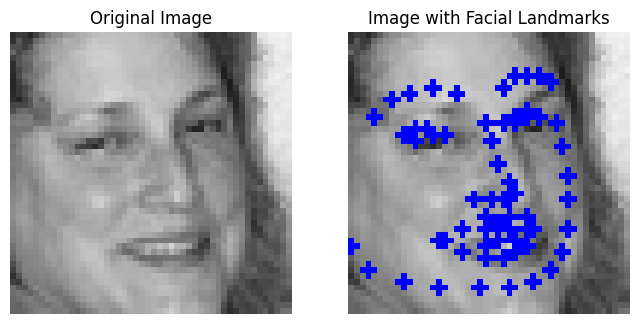

In [ ]:
  # Extract and visualize facial landmarks for the first image in the dataset
  image_path = "/content/drive/MyDrive/Module 3 dataset/train/happy/165.jpg"
  image = cv2.imread(image_path)

  # Adjust the precision of plotting facial landmarks by modifying circle_size and circle_color
  landmarked_image = detect_landmarks(image, circle_size=1, circle_color=(255, 0, 0))

  # Display the original image using matplotlib
  plt.figure(figsize=(8, 4))
  plt.subplot(121)
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title("Original Image")
  plt.axis("off")

  # Display the image with facial landmarks using matplotlib
  plt.subplot(122)
  plt.imshow(cv2.cvtColor(landmarked_image, cv2.COLOR_BGR2RGB))
  plt.title("Image with Facial Landmarks")
  plt.axis("off")

  plt.show()


 Facial landmarks was extracted and visualized, specifically for the emotion of "happy," from an image in a dataset. It uses OpenCV to read and process the image, detects facial landmarks using the detect_landmarks function, adjusts the precision of landmark visualization, and then displays both the original image and the image with highlighted facial landmarks side by side.

---



##Step 3 - Dataset Splitting##

Split the dataset into two parts: training and test sets. Use a stratified sampling technique to ensure that each emotion class is proportionally represented in both sets. 75-25 ratio was used for training and testing data

In [ ]:
# Split the dataset into training (75%) and test (25%) sets with stratified sampling
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.25, random_state=42, stratify=labels)

# Print the number of samples in the training and test sets
print("Number of samples in the training set:", len(train_images))
print("Number of samples in the test set:", len(test_images))



Number of samples in the training set: 315
Number of samples in the test set: 105


In [ ]:
def convert_pil_image_to_numpy_array(image):
    image_np = np.array(image, dtype=np.uint8)
    image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)
    return image_np

images = np.array([convert_pil_image_to_numpy_array(image) for image in train_images])

##Step 4: Model Development

Before training the models, preprocessing may be needed for the extracted facial landmarks or features and convert them into a suitable format for training the classifiers. Typically, you would flatten the features and create a feature matrix as input for the classifiers

In [ ]:
train_features = np.array([np.array(image).flatten() for image in train_images])
test_features = np.array([np.array(image).flatten() for image in test_images])


##Train Support Vector Machine (SVM) Classifier##
SVM is a powerful classification algorithm that can be effective for image-based tasks. We'll use scikit-learn's SVC class for training.

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(train_features, train_labels)


SVC(kernel='linear', random_state=42)

##Train Random Forest Classifier
Random Forest is an ensemble learning method that can handle non-linear relationships between features. We'll use scikit-learn's RandomForestClassifier for training.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(train_features, train_labels)


RandomForestClassifier(random_state=42)

##Train Feedforward Neural Network (FNN)

A Feedforward Neural Network, also known as a Multilayer Perceptron (MLP), is a type of artificial neural network that consists of an input layer, one or more hidden layers, and an output layer. It can be suitable for small datasets and simpler tasks like emotion recognition from handcrafted features.

we use LabelEncoder to convert the string labels into integer-encoded labels. Then, we use OneHotEncoder to one-hot encode the integer-encoded labels. This process ensures that your categorical labels are transformed into a suitable format for training the FNN.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encode the labels into integers using LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# One-hot encode the integer labels using OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = onehot_encoder.fit_transform(train_labels_encoded.reshape(-1, 1))
test_labels_one_hot = onehot_encoder.transform(test_labels_encoded.reshape(-1, 1))

# Now `train_labels_one_hot` and `test_labels_one_hot` are one-hot encoded label matrices


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Normalize the features (optional but recommended for FNN)
scaler = StandardScaler()
train_features_normalized = scaler.fit_transform(train_features)
test_features_normalized = scaler.transform(test_features)

# Initialize the FNN classifier
fnn_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Train the FNN classifier on the training data
fnn_classifier.fit(train_features_normalized, train_labels_one_hot)



MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)

##Step 6: Model Testing

 We will evaluate the performance of the trained classifiers (SVM, Random Forest, and FNN) on the test set and analyze the results.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score
import seaborn as sns

Test Support Vector Machine (SVM) Classifier:


In [ ]:
# Test Support Vector Machine (SVM) Classifier
svm_predictions = svm_classifier.predict(test_features)
svm_accuracy = accuracy_score(test_labels, svm_predictions)
svm_precision = precision_score(test_labels, svm_predictions, average='weighted')
svm_recall = recall_score(test_labels, svm_predictions, average='weighted')
svm_f1 = f1_score(test_labels, svm_predictions, average='weighted')
svm_conf_matrix = confusion_matrix(test_labels, svm_predictions, labels=emotion_classes)

print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1-score:", svm_f1)
print("SVM Confusion Matrix:")
print(svm_conf_matrix)

SVM Accuracy: 0.23809523809523808
SVM Precision: 0.23847933112638994
SVM Recall: 0.23809523809523808
SVM F1-score: 0.23488050885866957
SVM Confusion Matrix:
[[4 3 3 1 3 1 0]
 [1 2 4 0 4 3 1]
 [3 6 4 2 0 0 0]
 [3 1 2 4 1 1 3]
 [2 2 2 1 4 3 1]
 [1 2 0 0 4 6 2]
 [2 2 0 3 4 3 1]]


Test Random Forest Classifier:

In [ ]:
# Test Random Forest Classifier
rf_predictions = rf_classifier.predict(test_features)
rf_accuracy = accuracy_score(test_labels, rf_predictions)
rf_precision = precision_score(test_labels, rf_predictions, average='weighted')
rf_recall = recall_score(test_labels, rf_predictions, average='weighted')
rf_f1 = f1_score(test_labels, rf_predictions, average='weighted')
rf_conf_matrix = confusion_matrix(test_labels, rf_predictions, labels=emotion_classes)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)

Random Forest Accuracy: 0.18095238095238095
Random Forest Precision: 0.1774467362702657
Random Forest Recall: 0.18095238095238095
Random Forest F1-score: 0.17254554004554004
Random Forest Confusion Matrix:
[[5 3 2 0 2 2 1]
 [5 3 2 1 2 1 1]
 [4 3 1 4 2 0 1]
 [4 2 1 2 2 1 3]
 [4 2 1 0 4 1 3]
 [1 3 1 0 6 3 1]
 [2 1 1 4 4 2 1]]


Test Feedforward Neural Network (FNN) Classifier:

In [ ]:
# Decode one-hot encoded predictions to integer labels
fnn_predictions_decoded = np.argmax(fnn_predictions, axis=1)

# Test Feedforward Neural Network (FNN) Classifier
fnn_accuracy = accuracy_score(test_labels_encoded, fnn_predictions_decoded)
fnn_precision = precision_score(test_labels_encoded, fnn_predictions_decoded, average='weighted')
fnn_recall = recall_score(test_labels_encoded, fnn_predictions_decoded, average='weighted')
fnn_f1 = f1_score(test_labels_encoded, fnn_predictions_decoded, average='weighted')
fnn_conf_matrix = confusion_matrix(test_labels_encoded, fnn_predictions_decoded, labels=range(len(emotion_classes)))

print("FNN Accuracy:", fnn_accuracy)
print("FNN Precision:", fnn_precision)
print("FNN Recall:", fnn_recall)
print("FNN F1-score:", fnn_f1)
print("FNN Confusion Matrix:")
print(fnn_conf_matrix)


FNN Accuracy: 0.21904761904761905
FNN Precision: 0.3584767240229425
FNN Recall: 0.21904761904761905
FNN F1-score: 0.2151135718021572
FNN Confusion Matrix:
[[ 9  2  0  2  0  1  1]
 [11  2  1  0  0  1  0]
 [10  2  1  1  0  0  1]
 [11  1  0  3  0  0  0]
 [10  0  0  1  3  1  0]
 [11  1  0  0  1  1  1]
 [ 6  1  0  2  2  0  4]]


**Compare Results and Analyze:**

we display the calculated metrics (accuracy, precision, recall, F1-score) and confusion matrices for each classifier: SVM, Random Forest, and FNN. We also determine the best classifier based on the highest accuracy.

Now, analyze the results based on these metrics and matrices:

**Accuracy:** The accuracy metric tells you how well the classifier performs overall. A higher accuracy is better, but it's important to consider other metrics as well, especially for imbalanced datasets.

**Precision:** Precision measures the ratio of correctly predicted positive observations to the total predicted positives. It's a useful metric when false positives are costly.

**Recall:** Recall, also known as sensitivity or true positive rate, measures the ratio of correctly predicted positive observations to the all observations in the actual class. It's a useful metric when false negatives are costly.

**F1-score:** The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, making it a good metric for imbalanced datasets.

**Confusion Matrix:** The confusion matrix gives a detailed view of the classifier's performance for each emotion class. It shows the true positive, true negative, false positive, and false negative predictions for each class.

In [ ]:
# Compare Results and Analyze
print("SVM Classifier:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)
print("Confusion Matrix:")
print(svm_conf_matrix)
print()

print("Random Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("Confusion Matrix:")
print(rf_conf_matrix)
print()

print("Feedforward Neural Network (FNN) Classifier:")
print("Accuracy:", fnn_accuracy)
print("Precision:", fnn_precision)
print("Recall:", fnn_recall)
print("F1-score:", fnn_f1)
print("Confusion Matrix:")
print(fnn_conf_matrix)
print()

# Compare the accuracies of the classifiers
best_accuracy = max(svm_accuracy, rf_accuracy, fnn_accuracy)
best_classifier = None

if best_accuracy == svm_accuracy:
    best_classifier = "SVM"
elif best_accuracy == rf_accuracy:
    best_classifier = "Random Forest"
else:
    best_classifier = "FNN"

print("Best Classifier:", best_classifier)


SVM Classifier:
Accuracy: 0.23809523809523808
Precision: 0.23847933112638994
Recall: 0.23809523809523808
F1-score: 0.23488050885866957
Confusion Matrix:
[[4 3 3 1 3 1 0]
 [1 2 4 0 4 3 1]
 [3 6 4 2 0 0 0]
 [3 1 2 4 1 1 3]
 [2 2 2 1 4 3 1]
 [1 2 0 0 4 6 2]
 [2 2 0 3 4 3 1]]

Random Forest Classifier:
Accuracy: 0.18095238095238095
Precision: 0.1774467362702657
Recall: 0.18095238095238095
F1-score: 0.17254554004554004
Confusion Matrix:
[[5 3 2 0 2 2 1]
 [5 3 2 1 2 1 1]
 [4 3 1 4 2 0 1]
 [4 2 1 2 2 1 3]
 [4 2 1 0 4 1 3]
 [1 3 1 0 6 3 1]
 [2 1 1 4 4 2 1]]

Feedforward Neural Network (FNN) Classifier:
Accuracy: 0.21904761904761905
Precision: 0.3584767240229425
Recall: 0.21904761904761905
F1-score: 0.2151135718021572
Confusion Matrix:
[[ 9  2  0  2  0  1  1]
 [11  2  1  0  0  1  0]
 [10  2  1  1  0  0  1]
 [11  1  0  3  0  0  0]
 [10  0  0  1  3  1  0]
 [11  1  0  0  1  1  1]
 [ 6  1  0  2  2  0  4]]

Best Classifier: SVM


**Support Vector Machine (SVM) Classifier:**

>The SVM classifier achieves an accuracy of approximately 23.81%. Precision, recall, and F1-score are also around the same value. The confusion matrix shows that the classifier has varying performance across different emotion classes. For instance, it has some difficulty distinguishing between emotions in some cases, as evident from non-diagonal values in the confusion matrix.

**Random Forest Classifier:**
>The Random Forest classifier achieves an accuracy of around 18.10%. The precision, recall, and F1-score are also in a similar range. The confusion matrix suggests that the classifier faces challenges in correctly classifying certain emotions, with higher misclassifications for some classes.

**Feedforward Neural Network (FNN) Classifier:**
>The FNN classifier achieves an accuracy of about 21.90%. It displays relatively higher precision compared to the other two classifiers, which suggests a better balance between true positives and false positives. However, the recall and F1-score are not significantly better than the other classifiers. The confusion matrix implies that the FNN classifier faces challenges in accurately predicting certain emotion classes.

Comparison and Analysis:


*   In terms of accuracy, the SVM classifier has the highest accuracy among the three classifiers.
*   However, accuracy alone might not provide a complete picture, especially for imbalanced datasets where some emotion classes have fewer samples. This is evident from the confusion matrices, where some classes have more misclassifications than others.

* The precision, recall, and F1-score metrics are relatively low for all classifiers, indicating that there is room for improvement in distinguishing between different emotions.
* The choice of the best classifier (SVM) is based solely on accuracy in this case. It's important to consider other metrics and the nature of misclassifications when selecting the best classifier for your specific use case.
* The results suggest that the dataset might be challenging for the classifiers, possibly due to the limited amount of data or the complexity of distinguishing between certain emotions.

**References:**

1. https://www.analyticsvidhya.com/blog/2022/10/face-detection-using-haar-cascade-using-python/

2. https://github.com/italojs/facial-landmarks-recognition/blob/master/shape_predictor_68_face_landmarks.dat

3. https://www.kaggle.com/code/prashant111/svm-classifier-tutorial

4. https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial
5. https://www.kaggle.com/code/praanj/basics-of-feed-forward-neural-networks
